<a href="https://www.kaggle.com/code/victorgonzlezgmez/gg-hc-proyecto-final?scriptVersionId=112957019" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

# leer el csv con las reseñas
reviews_df = pd.read_csv("/kaggle/input/jelidesserts/Reseas Pasteleria Jeli Desserts.csv")

reviews_df.head()

,Marca temporal,Genero,Edad,Opinión
0,2022/12/04 6:48:54 p. m. GMT-6,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú..."
1,2022/12/04 6:49:13 p. m. GMT-6,Femenino,28,"Postres muy ricos, sobre todo los pasteles con..."
2,2022/12/04 6:49:41 p. m. GMT-6,Femenino,44,"buen sabor; Para después de la comida, o de me..."
3,2022/12/04 6:49:42 p. m. GMT-6,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...
4,2022/12/04 6:49:59 p. m. GMT-6,Femenino,30,Sin duda de las mejores pasteles de chocolate ...


In [2]:
#dar formato a la fecha
fecha = reviews_df["Marca temporal"].str.split() # selecciona únicamente la fecha del formato de marca temporal
for i in range(len(reviews_df)):
    #agregar a la nueva columna
    reviews_df["Fecha"] = fecha[i][0]

# borrar columna sobrante
reviews_df = reviews_df.drop(labels="Marca temporal", axis=1)

reviews_df.head()

,Genero,Edad,Opinión,Fecha
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
reviews_df['puntuacion'] = reviews_df['Opinión'].apply(lambda text:sia.polarity_scores(str(text)))
reviews_df.head()

,Genero,Edad,Opinión,Fecha,puntuacion
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04,"{'neg': 0.14, 'neu': 0.582, 'pos': 0.279, 'com..."


In [5]:
reviews_df['compound']= reviews_df['puntuacion'].apply(lambda score_dict:score_dict['compound'])
reviews_df.head()

,Genero,Edad,Opinión,Fecha,puntuacion,compound
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04,"{'neg': 0.14, 'neu': 0.582, 'pos': 0.279, 'com...",0.5562


In [6]:
def val(sent):
    if sent>=0:
        return "positivo"
    else:
        return "negativo"
    
reviews_df['comp_score']= reviews_df['compound'].apply(lambda c: val(c))

reviews_df.head()

,Genero,Edad,Opinión,Fecha,puntuacion,compound,comp_score
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04,"{'neg': 0.14, 'neu': 0.582, 'pos': 0.279, 'com...",0.5562,positivo


In [7]:
total = reviews_df['comp_score'].count()

aux = reviews_df[reviews_df["comp_score"] == "negativo"]
negativas = aux['comp_score'].count()

aux = reviews_df[reviews_df["comp_score"] == "positivo"]
positivos = aux['comp_score'].count()

print("Total de reseñas %s,\t Total de reseñas positivas %s, \t Total de reseñas negativas %s"%(str(total),str(positivos),str(negativas)))

Total de reseñas 23,	 Total de reseñas positivas 22, 	 Total de reseñas negativas 1


In [8]:
import numpy as np
porcentP = positivos/total
porcentP = np.round(porcentP,2)

porcentN = negativas/total
porcentN = np.round(porcentN,2)

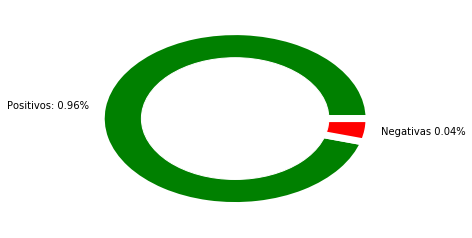

In [9]:
# create data
d = ['Positivos: '+str(porcentP)+'%','Negativas '+str(porcentN)+'%']
data = [positivos,negativas]
colors = ("green", "red")

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(data, labels=d, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors = colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()